In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

In [3]:
df=pd.read_csv("data.csv")

In [3]:
df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,3317.0,131.0,20.0,232.0,21.0,1762.0,237.0,195.0,136.0,...,1,0,0,0,0,0,0,0,0,1
1,2,3221.0,243.0,7.0,163.0,161.0,2153.0,196.0,222.0,131.0,...,0,0,0,1,0,0,0,0,0,1
2,3,3156.0,305.0,12.0,183.0,5.0,2769.0,240.0,253.0,235.0,...,1,0,0,0,0,0,0,0,0,1
3,4,3157.0,135.0,10.0,68.0,55.0,1641.0,227.0,253.0,159.0,...,1,0,0,0,0,0,0,0,0,1
4,5,3209.0,292.0,2.0,430.0,39.0,460.0,223.0,246.0,125.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126421,126422,3286.0,35.0,23.0,416.0,-3.0,942.0,241.0,229.0,148.0,...,0,0,0,0,0,0,0,1,0,7
126422,126423,3401.0,15.0,10.0,225.0,-5.0,1345.0,214.0,235.0,140.0,...,0,0,0,0,0,0,0,1,0,7
126423,126424,3481.0,131.0,37.0,102.0,118.0,2074.0,252.0,165.0,100.0,...,0,0,0,0,0,0,0,1,0,7
126424,126425,3482.0,50.0,17.0,127.0,43.0,1949.0,228.0,199.0,133.0,...,0,0,0,0,0,0,0,0,0,7


In [4]:
print(df.isnull().sum().sort_values(ascending=False))
#Eksik veriler

Elevation                             29
Hillshade_3pm                         19
Aspect                                17
Horizontal_Distance_To_Hydrology      13
Horizontal_Distance_To_Fire_Points    10
Hillshade_9am                          9
Hillshade_Noon                         9
Slope                                  7
Vertical_Distance_To_Hydrology         7
Horizontal_Distance_To_Roadways        7
Soil_Type24                            0
Soil_Type28                            0
Soil_Type27                            0
Soil_Type26                            0
Soil_Type25                            0
Id                                     0
Soil_Type23                            0
Soil_Type22                            0
Soil_Type21                            0
Soil_Type30                            0
Soil_Type29                            0
Soil_Type35                            0
Soil_Type31                            0
Soil_Type32                            0
Soil_Type33     

In [4]:
#Eksik veriler ortalamayla dolduruldu.
df["Elevation"].fillna(df["Elevation"].mean(),inplace=True)
df["Aspect"].fillna(df["Aspect"].mean(),inplace=True)
df["Slope"].fillna(df["Slope"].mean(),inplace=True)
df["Horizontal_Distance_To_Hydrology"].fillna(df["Horizontal_Distance_To_Hydrology"].mean(),inplace=True)
df["Vertical_Distance_To_Hydrology"].fillna(df["Vertical_Distance_To_Hydrology"].mean(),inplace=True)
df["Horizontal_Distance_To_Roadways"].fillna(df["Horizontal_Distance_To_Roadways"].mean(),inplace=True)
df["Hillshade_9am"].fillna(df["Hillshade_9am"].mean(),inplace=True)
df["Hillshade_Noon"].fillna(df["Hillshade_Noon"].mean(),inplace=True)
df["Hillshade_3pm"].fillna(df["Hillshade_3pm"].mean(),inplace=True)
df["Horizontal_Distance_To_Fire_Points"].fillna(df["Horizontal_Distance_To_Fire_Points"].mean(),inplace=True)

In [5]:
print(df.isnull().sum())
#Eksik veriler kontrol

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


<ipython-input-6-b5f2326e7fd6>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i,figsize=(6,8))


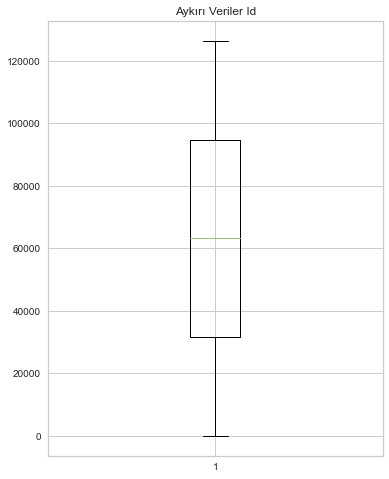

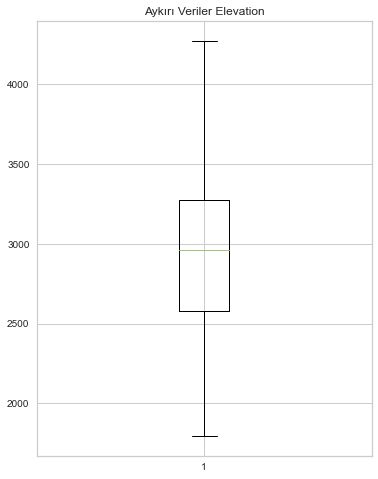

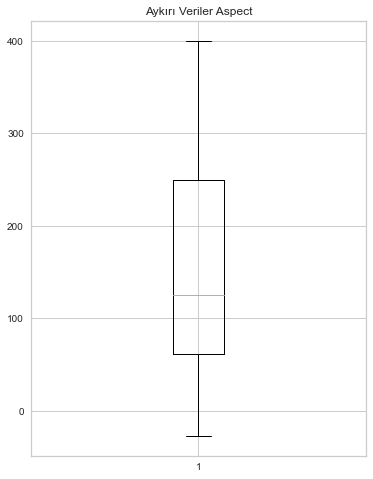

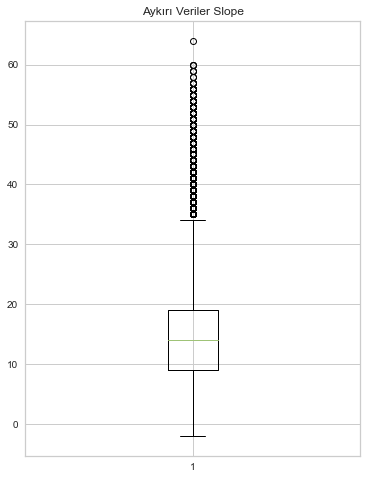

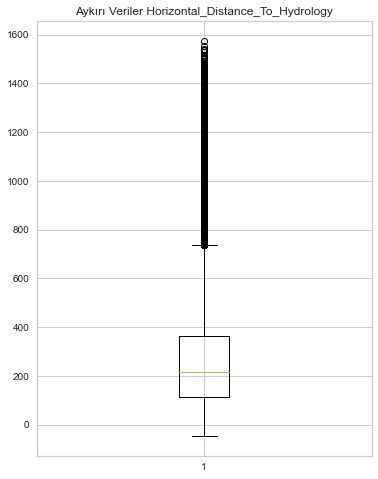

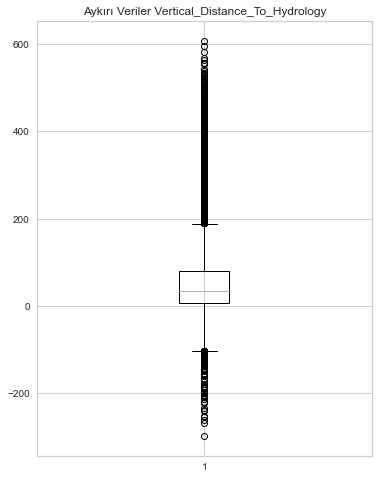

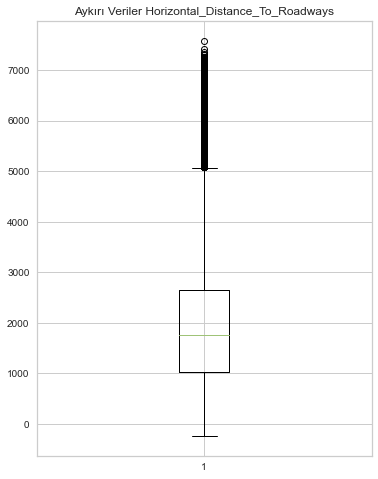

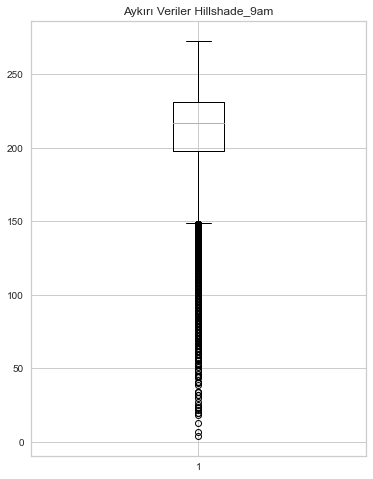

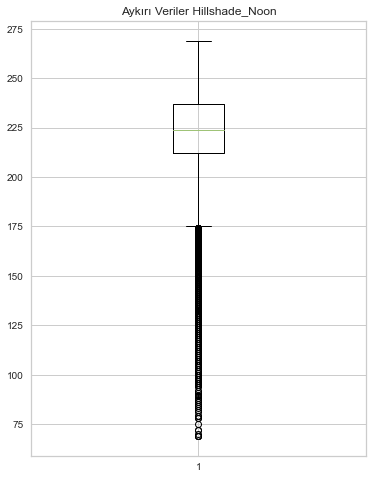

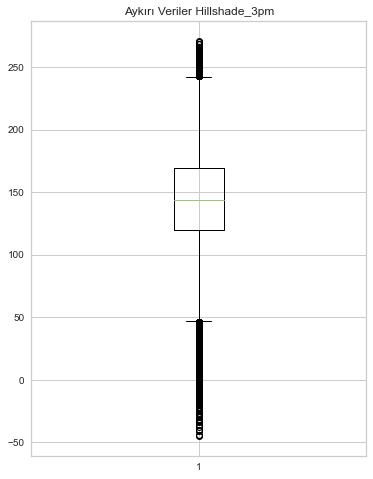

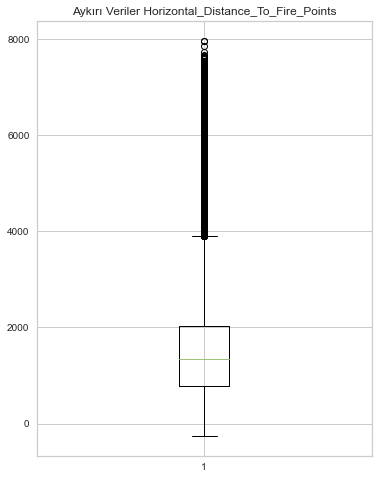

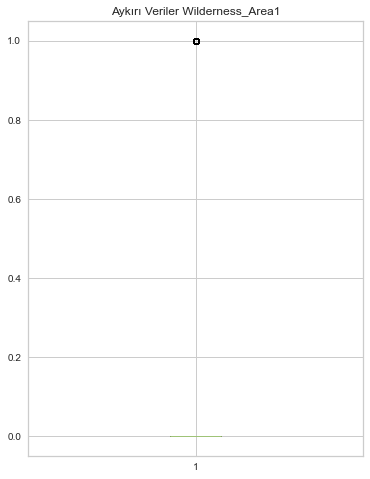

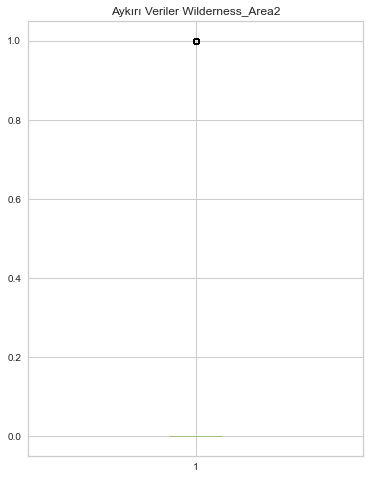

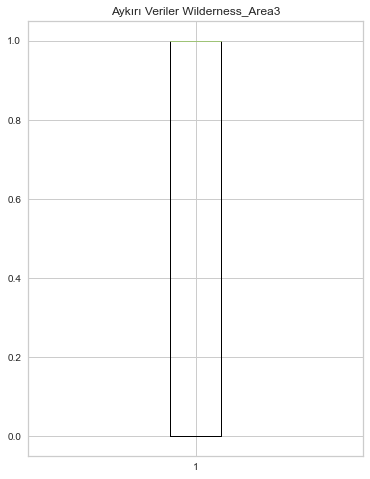

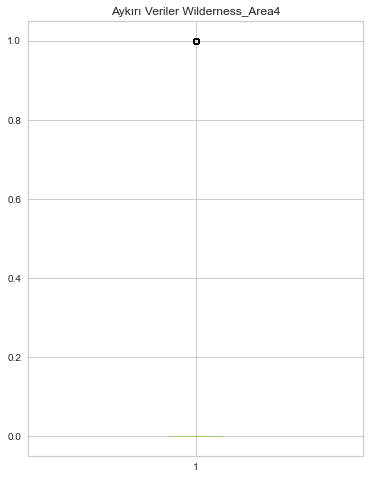

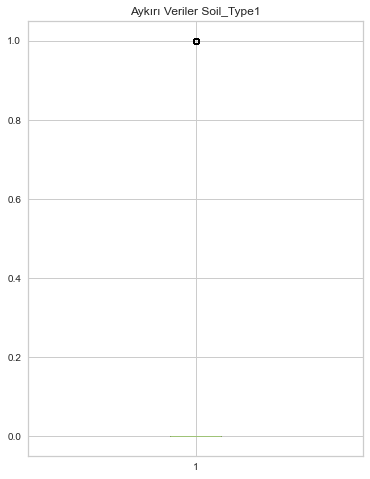

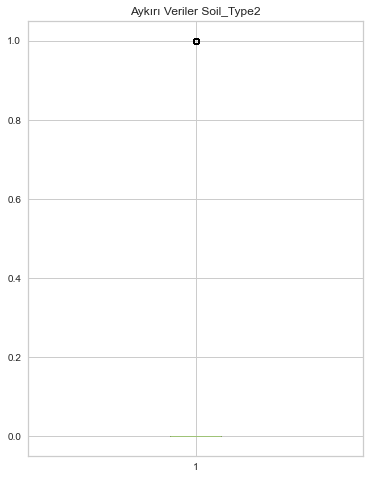

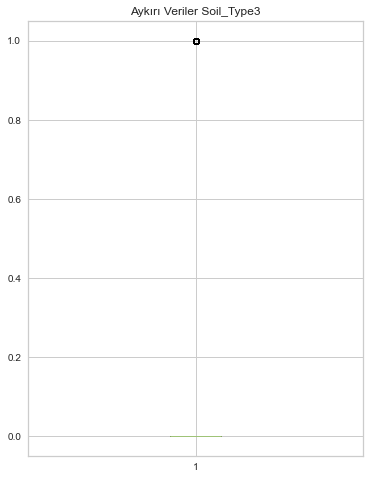

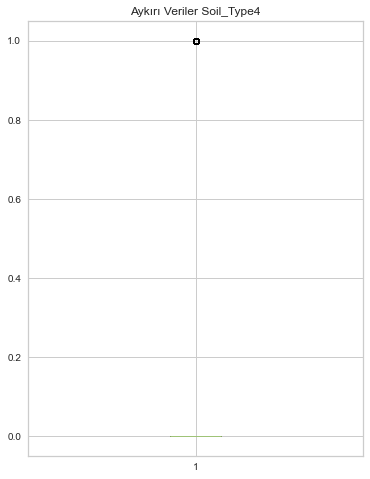

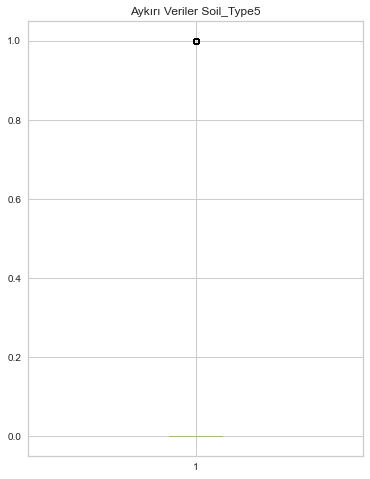

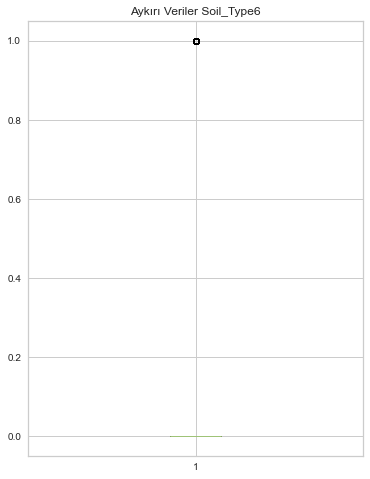

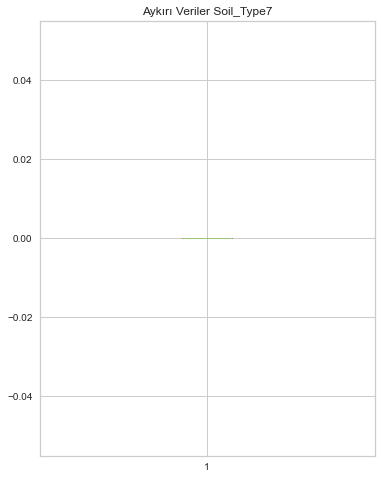

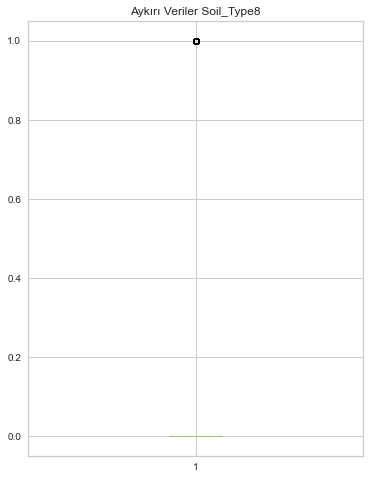

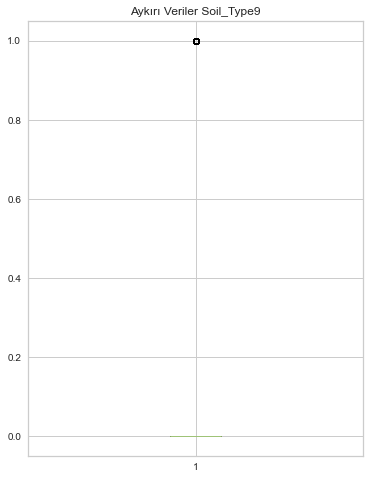

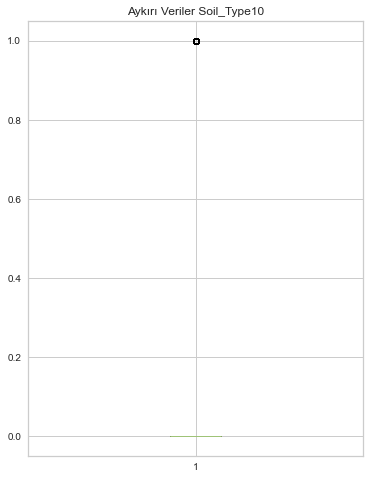

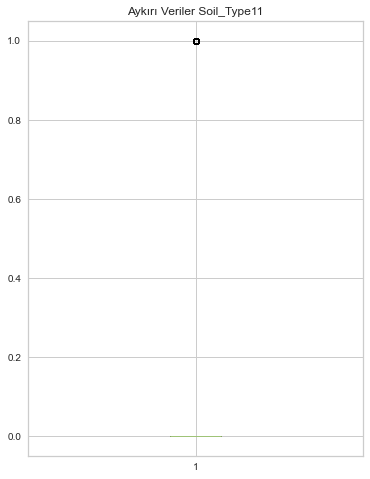

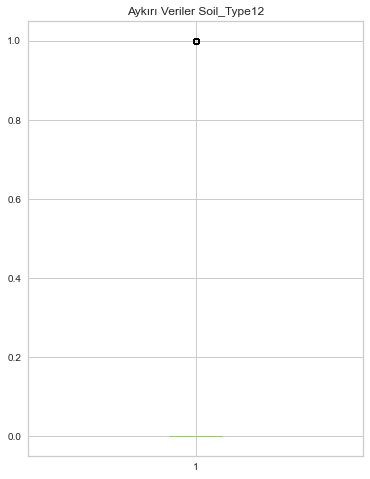

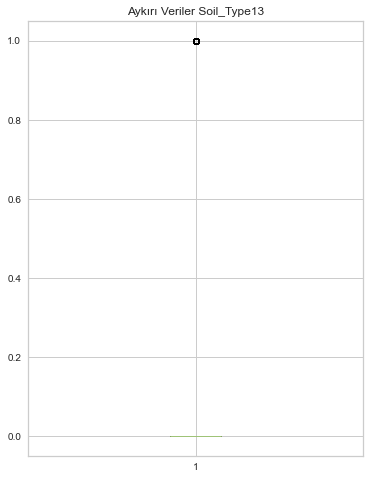

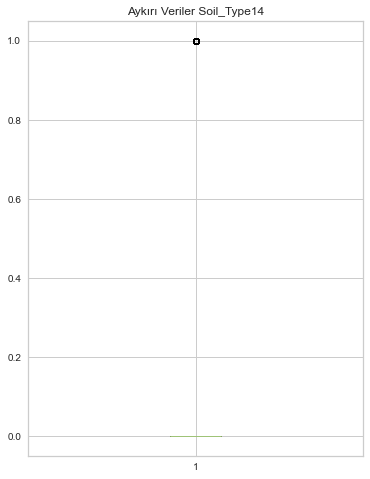

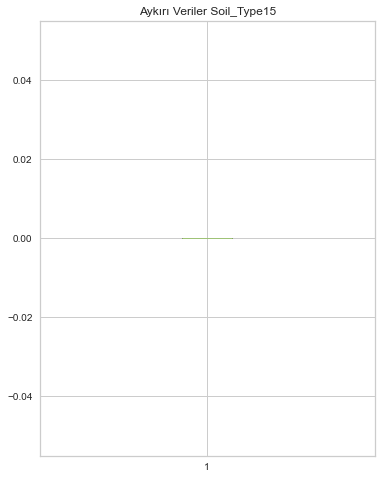

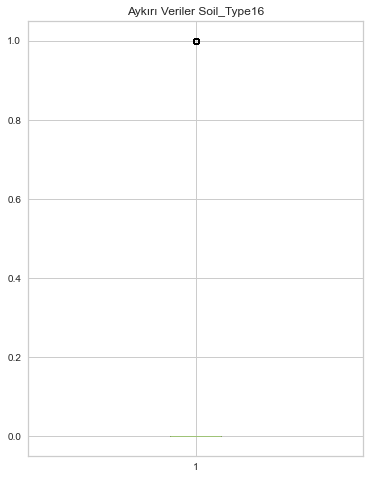

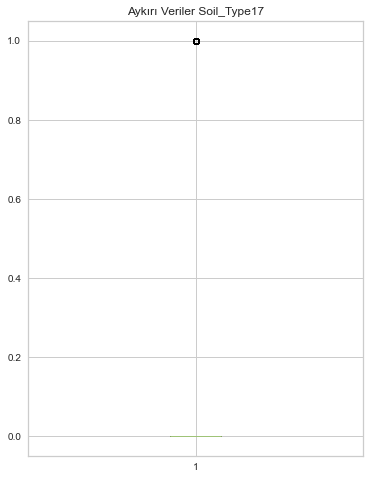

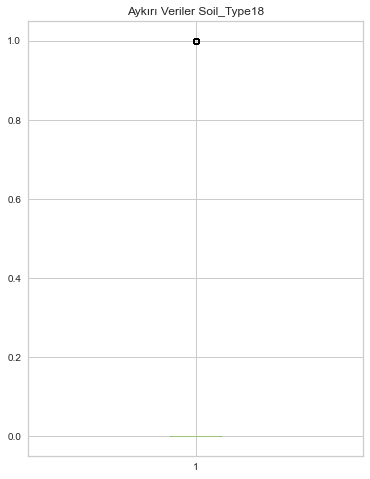

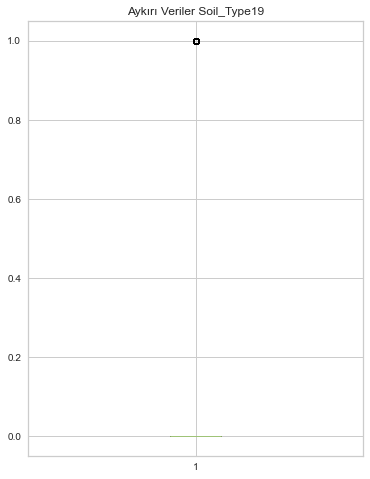

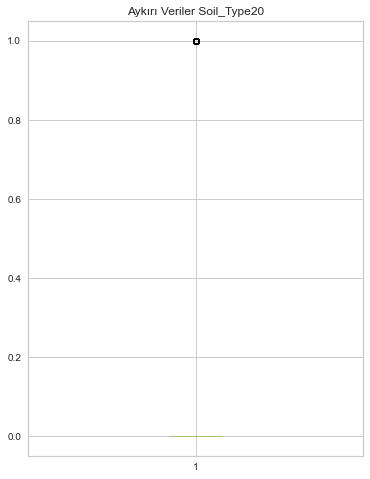

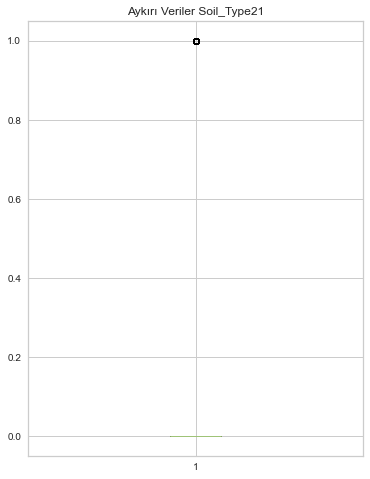

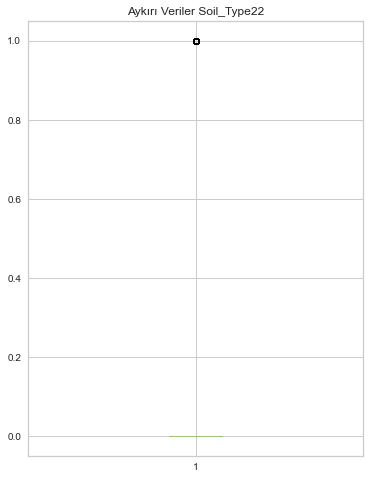

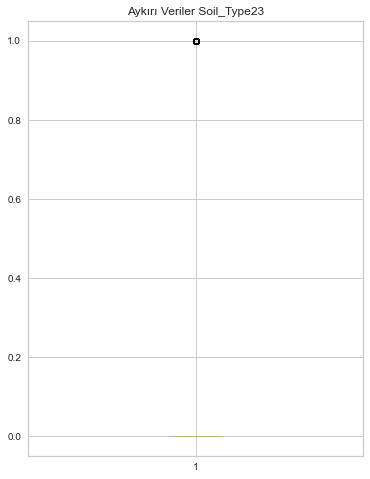

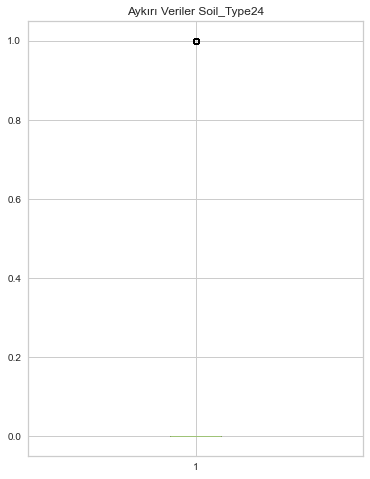

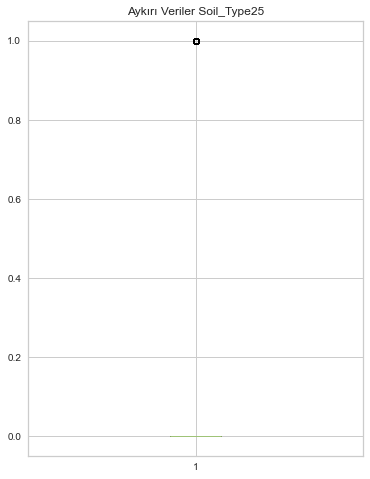

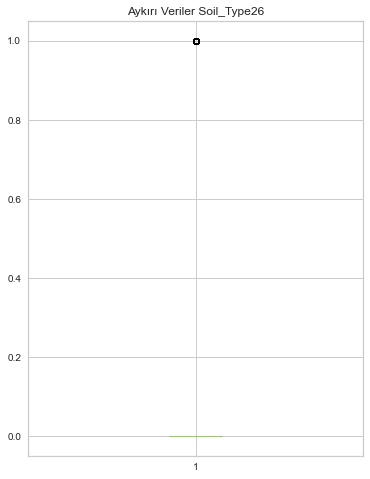

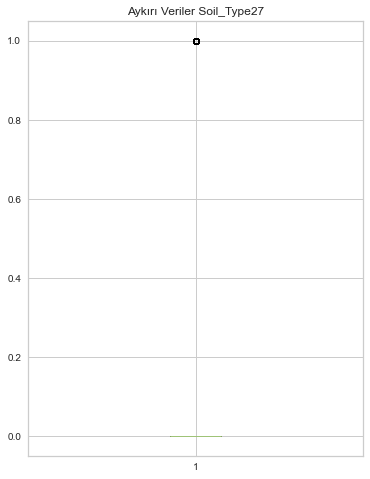

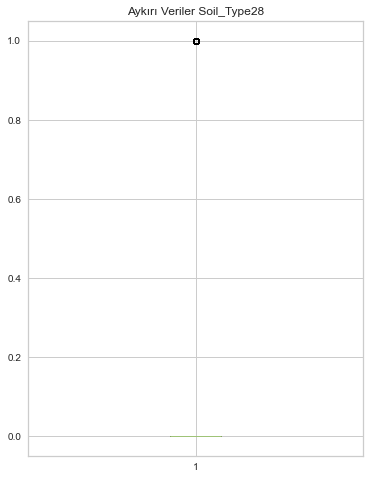

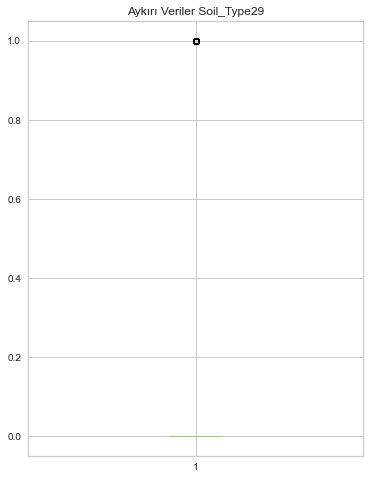

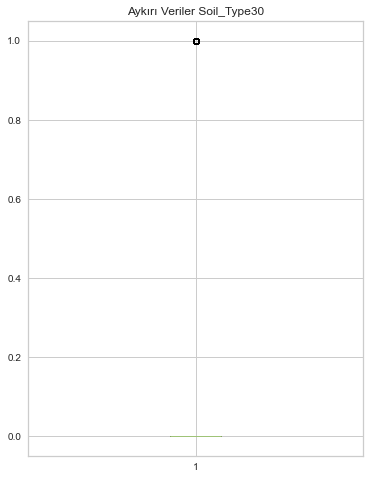

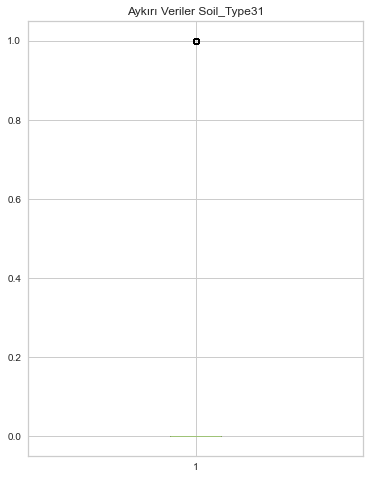

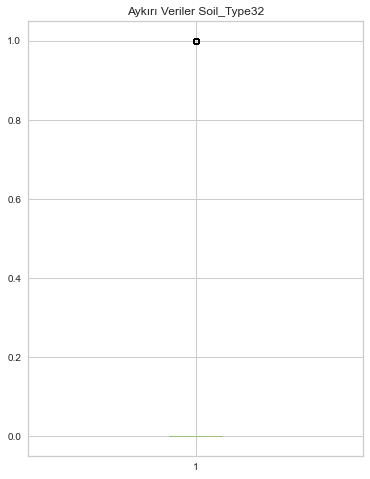

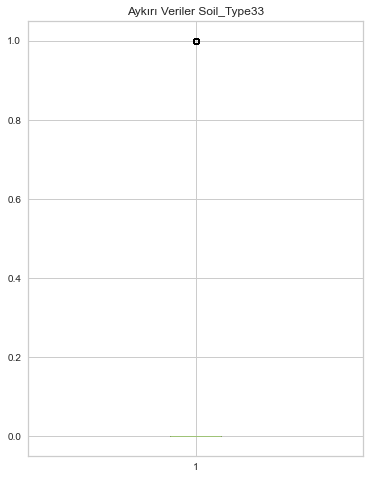

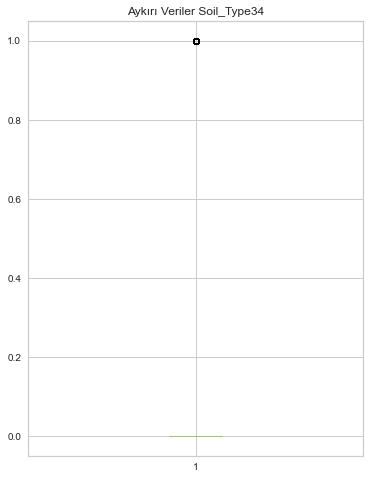

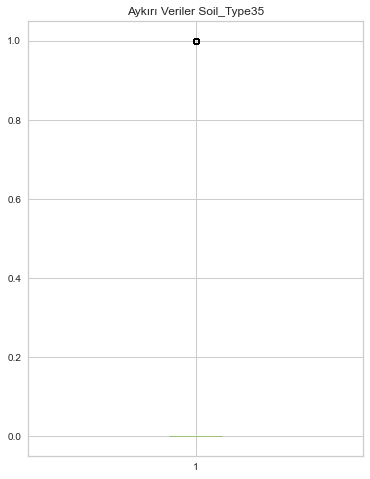

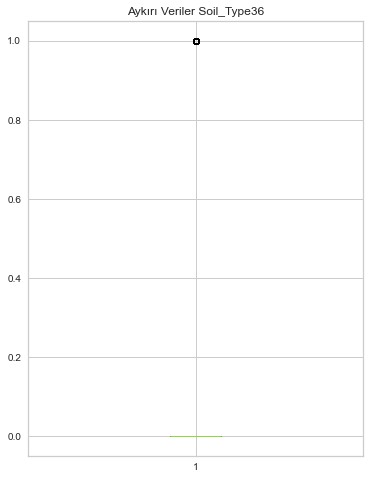

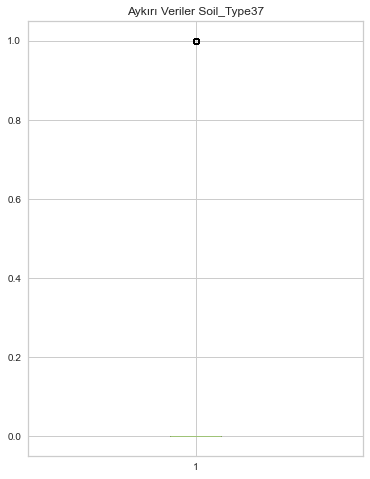

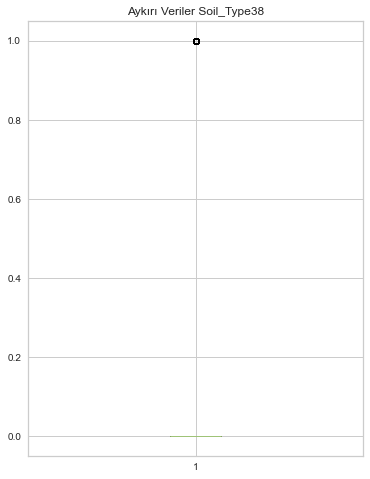

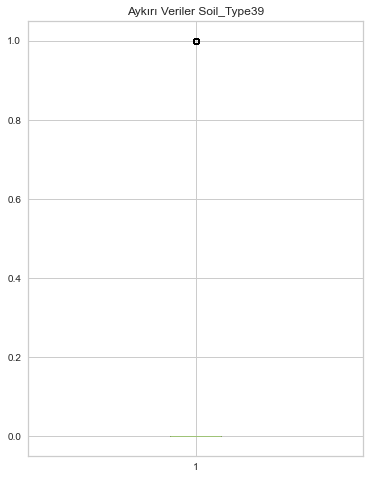

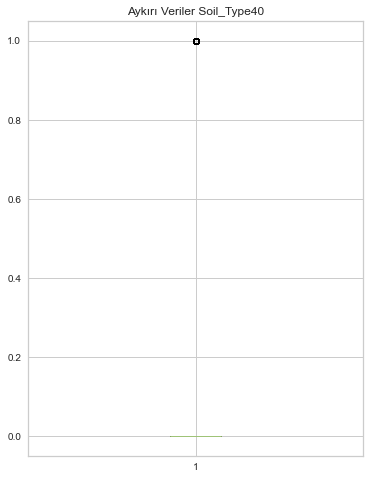

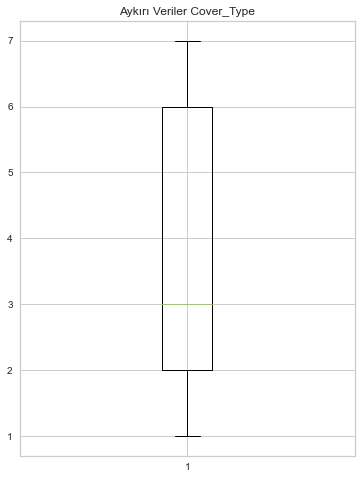

In [6]:
for i in df.columns:
    plt.figure(i,figsize=(6,8))
    plt.title("Aykırı Veriler "+i)
    plt.boxplot(df[i])

In [7]:
#Aykırı verilerin yerine ortalama değerler atandı.
for i in df.columns:   
    IQR = (np.quantile(df[i], 0.75))-(np.quantile(df[i], 0.25))
    alt_sinir = np.quantile(df[i], 0.25)-(1.5*IQR)
    ust_sinir = np.quantile(df[i], 0.75)+(1.5*IQR)
    df[i] = df[i].mask(df[i] > ust_sinir,df[i].mean())
    df[i] = df[i].mask(df[i] < alt_sinir,df[i].mean()) 

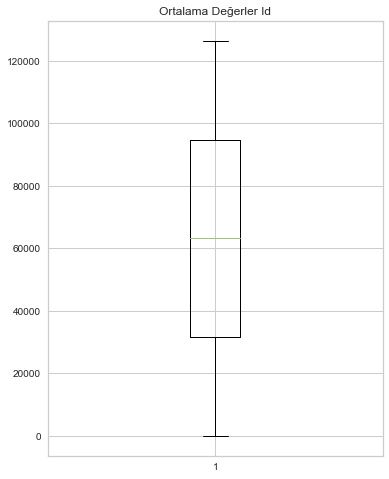

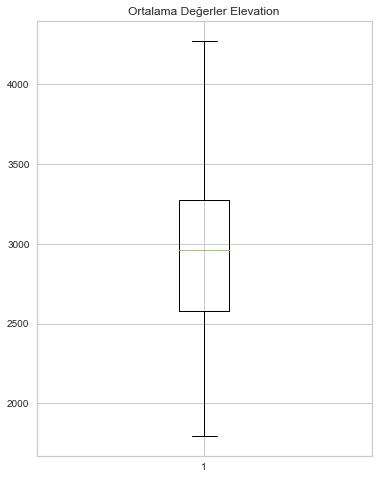

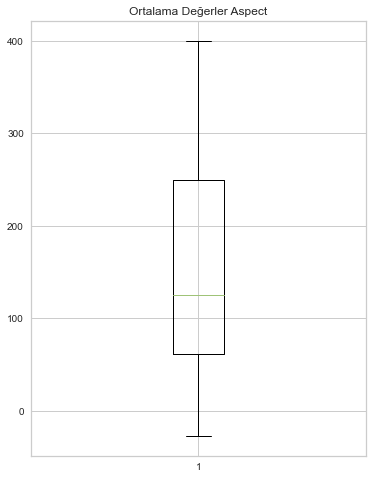

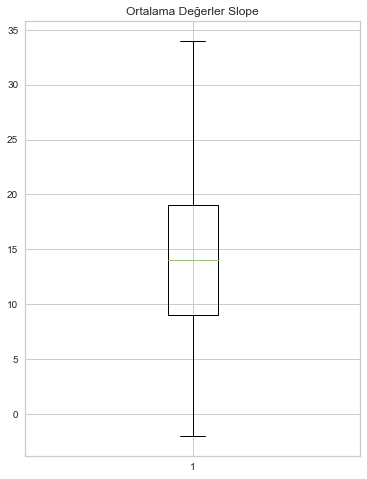

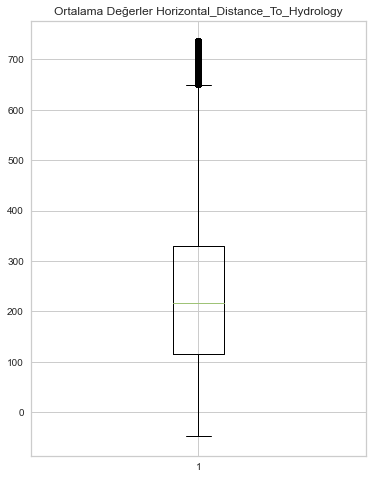

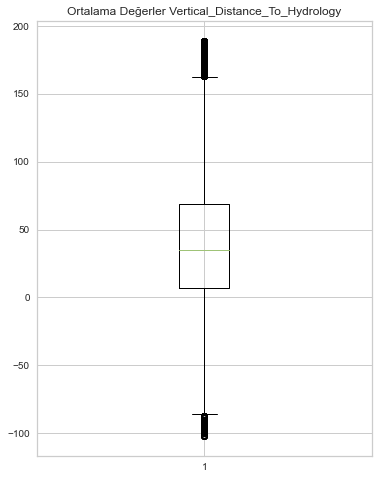

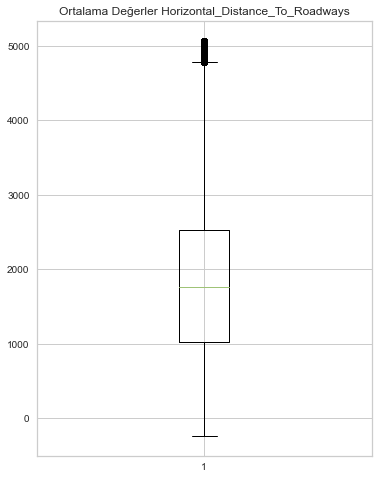

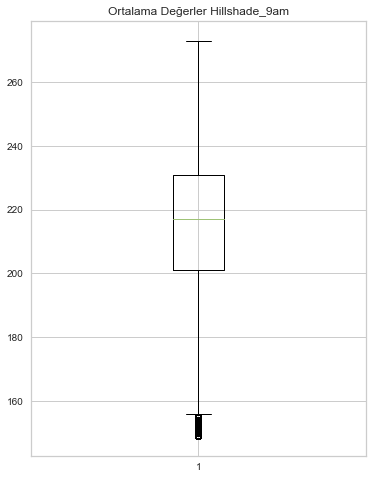

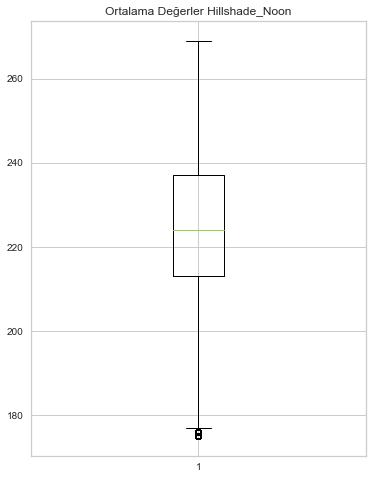

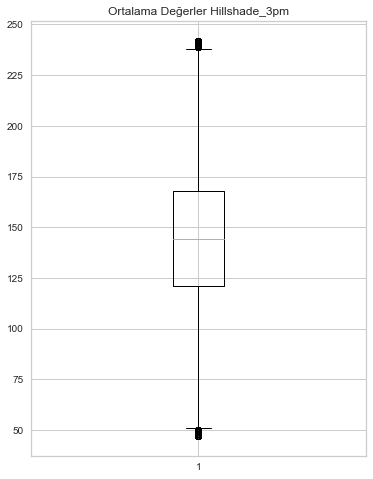

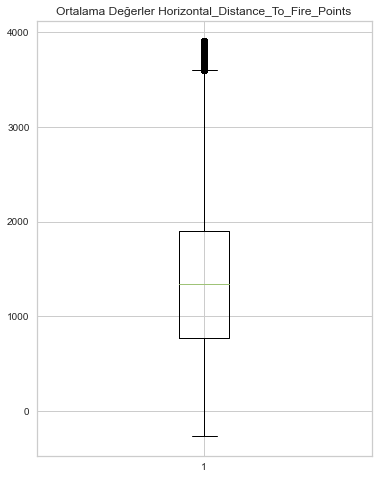

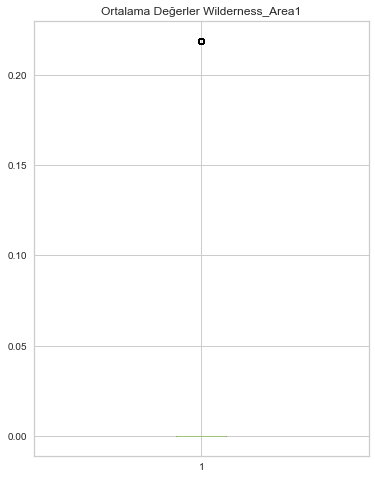

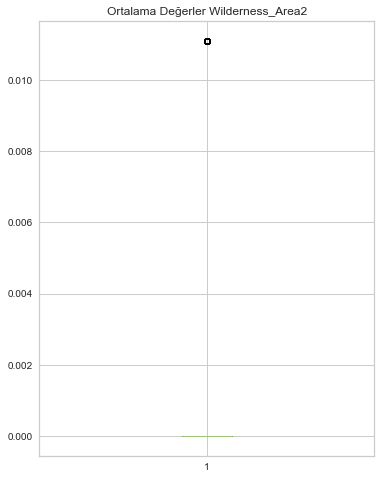

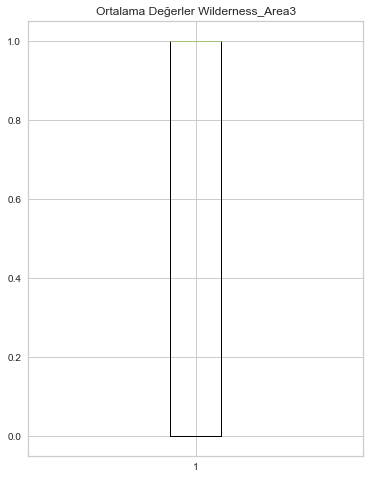

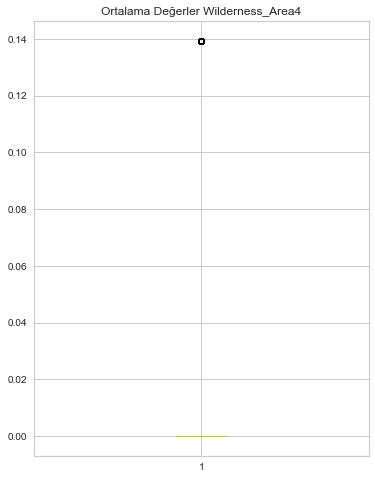

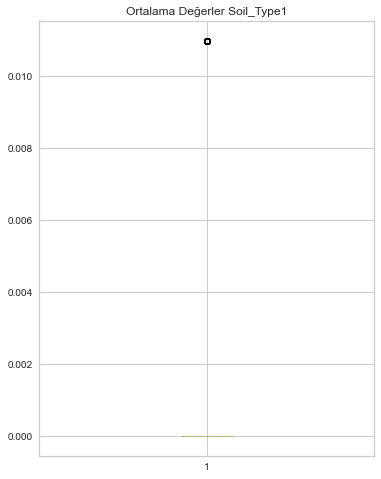

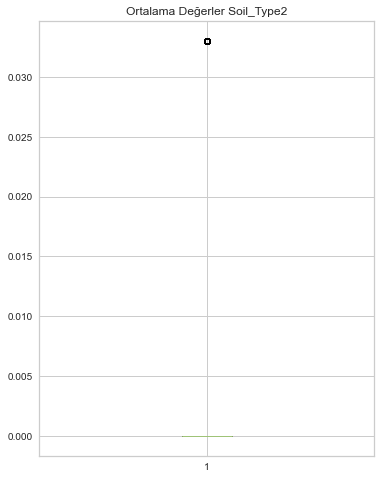

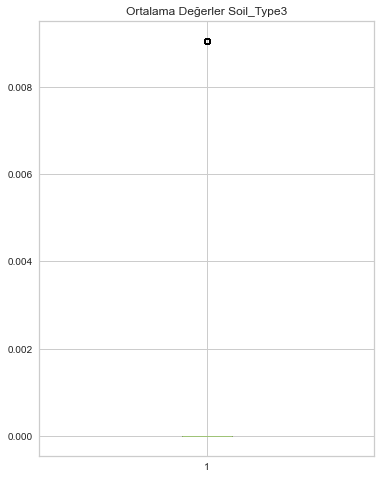

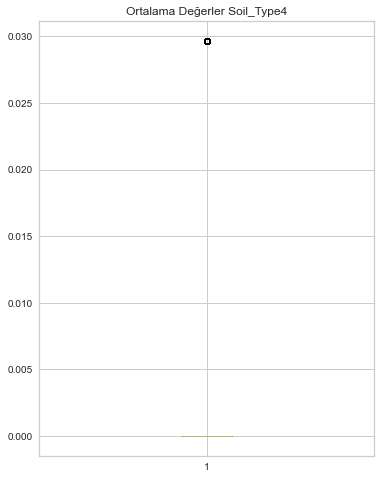

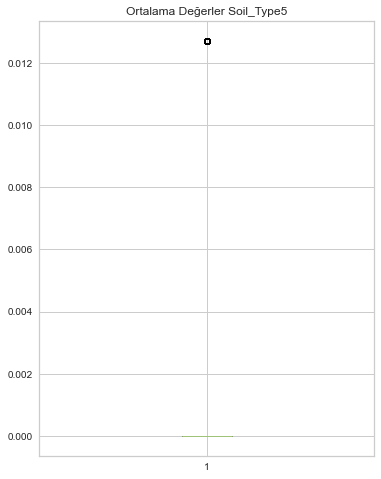

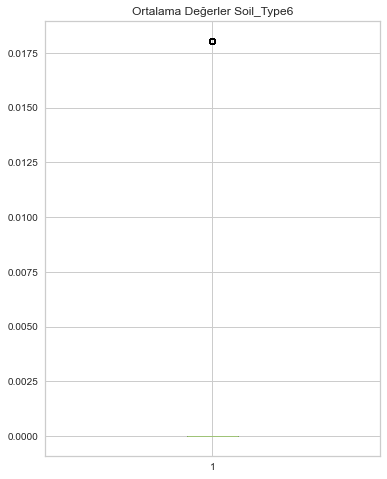

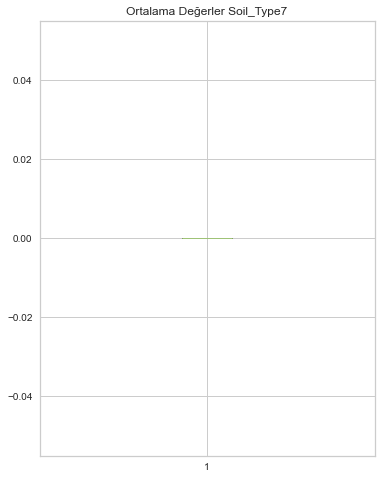

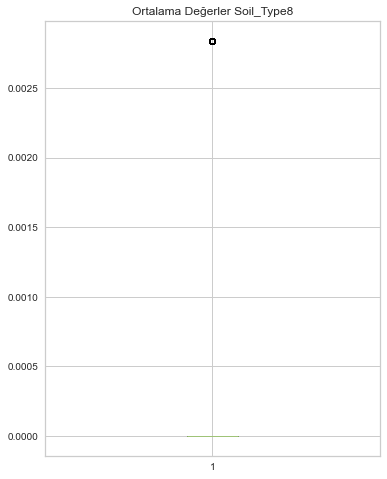

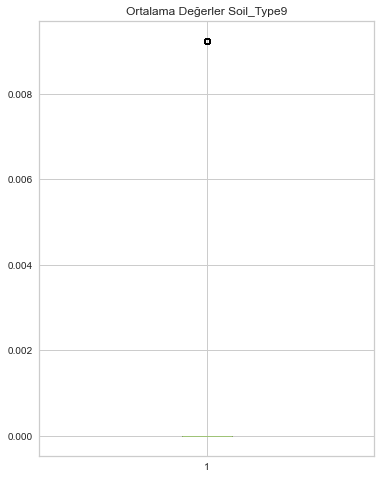

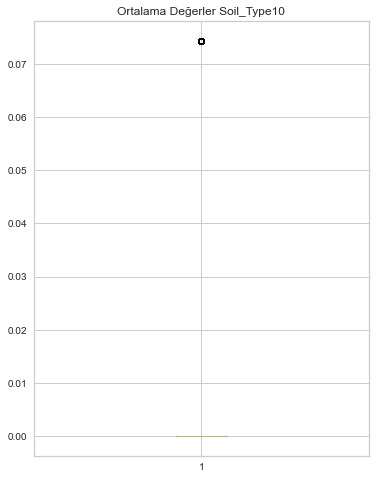

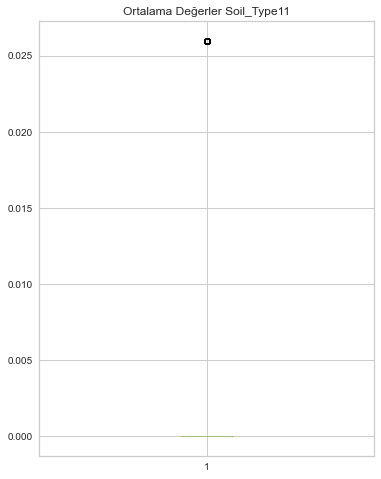

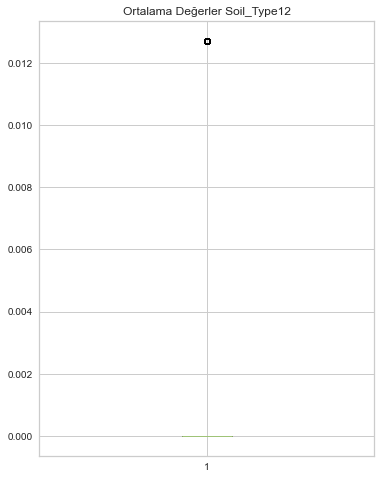

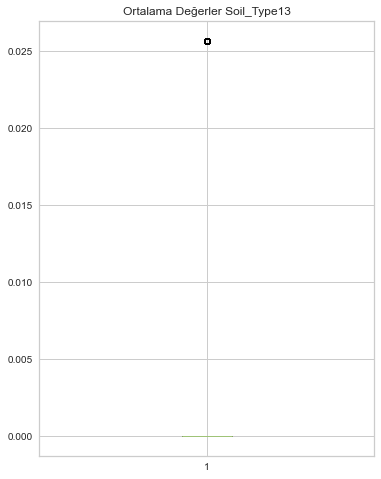

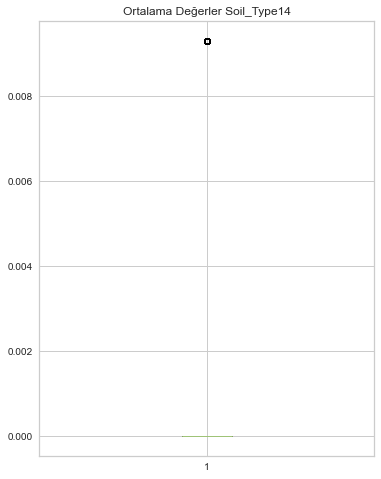

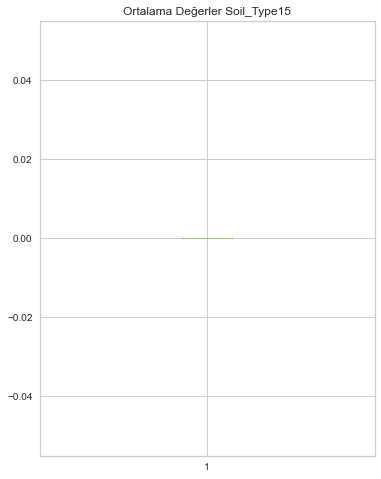

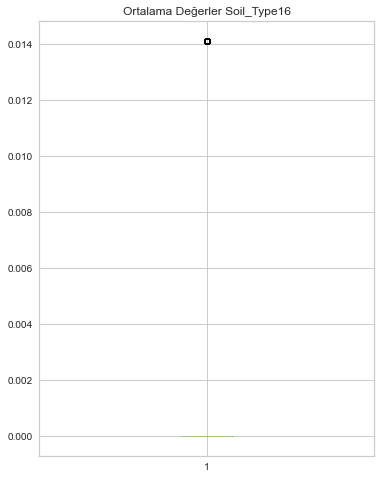

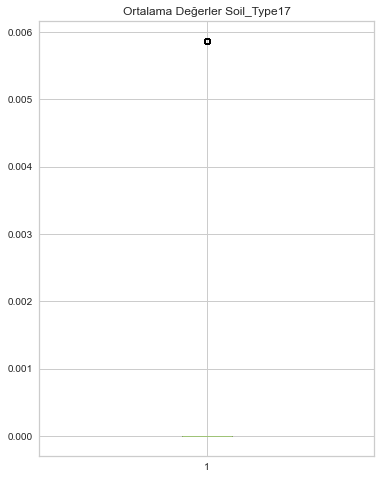

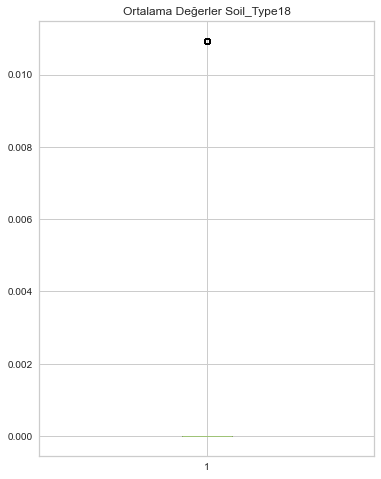

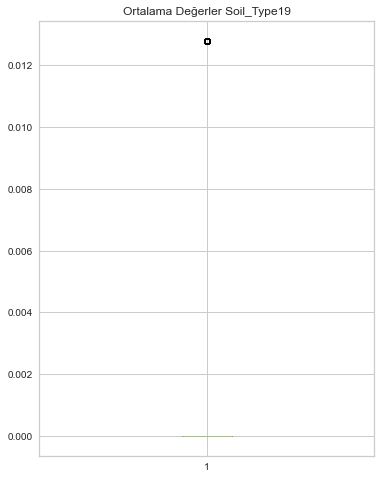

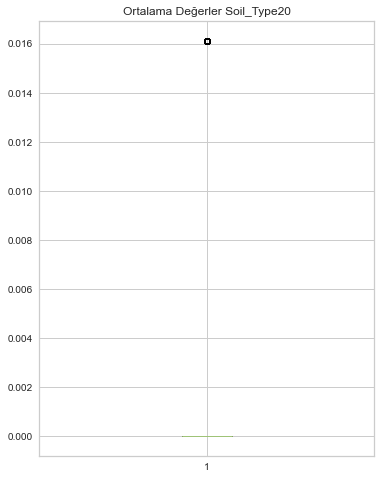

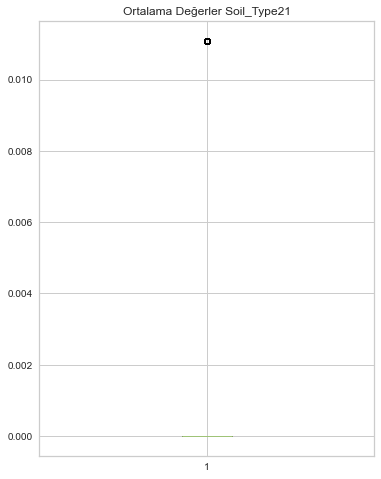

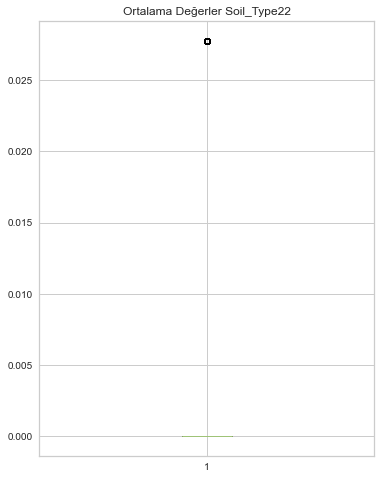

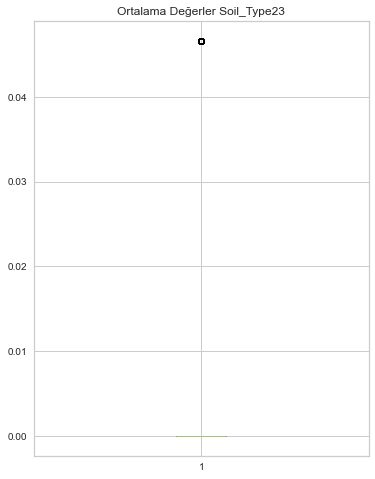

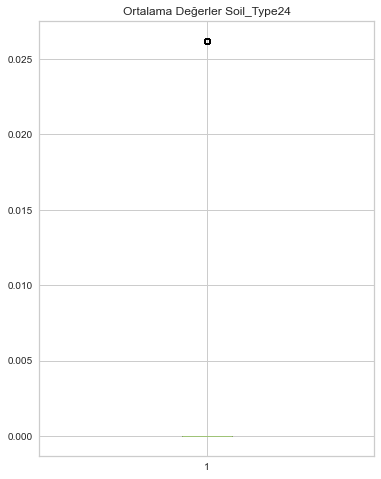

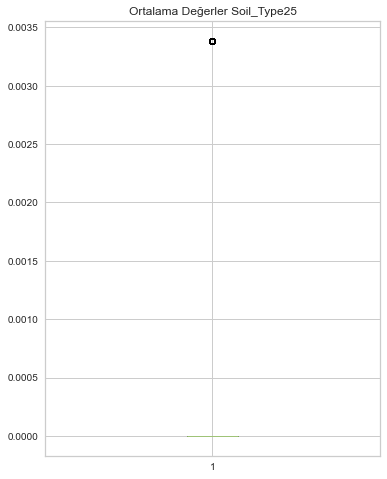

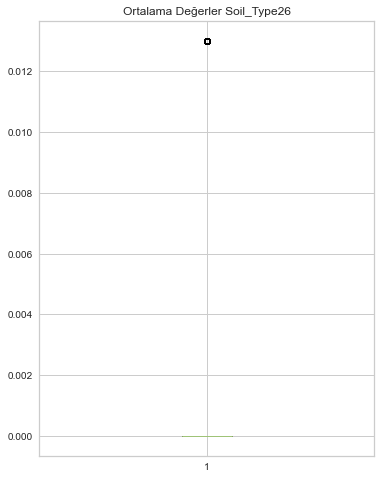

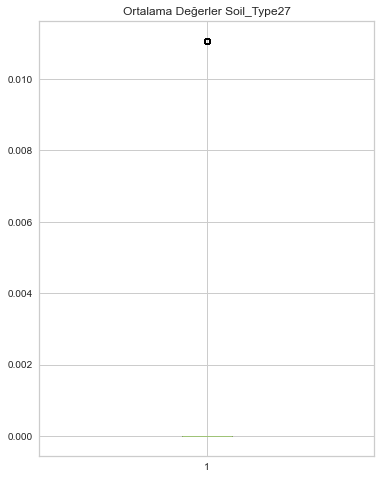

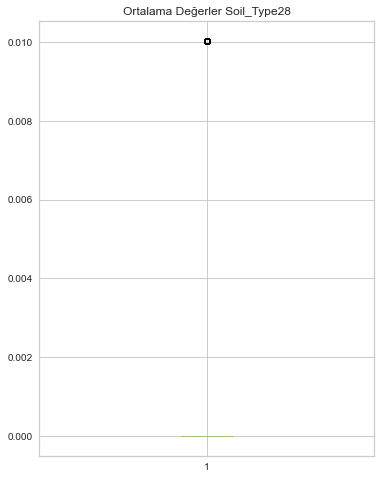

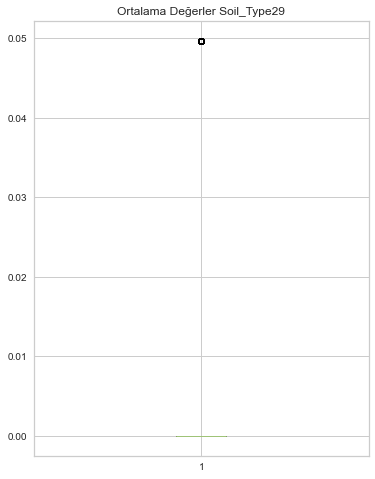

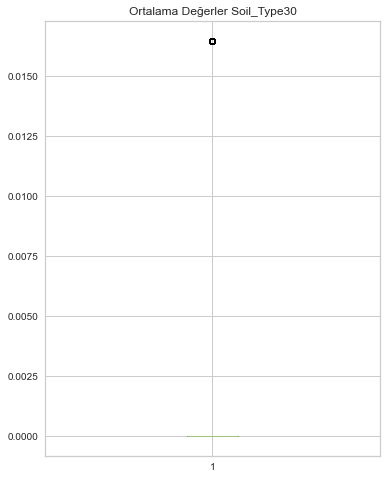

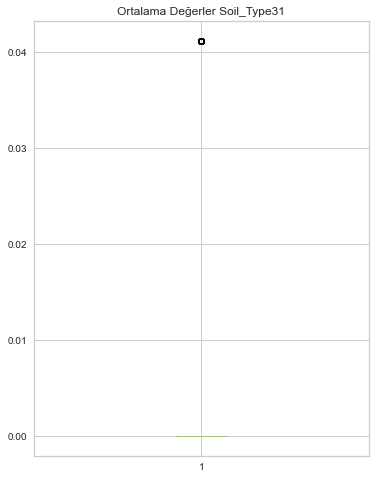

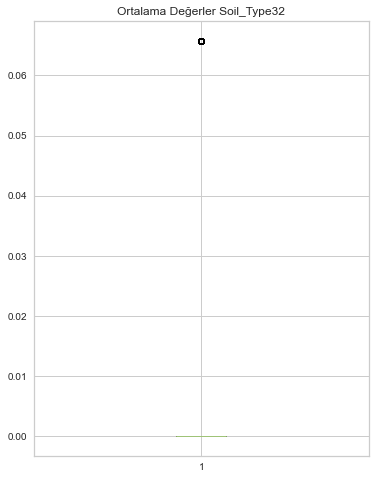

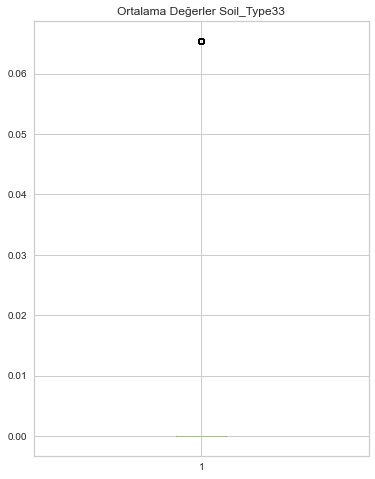

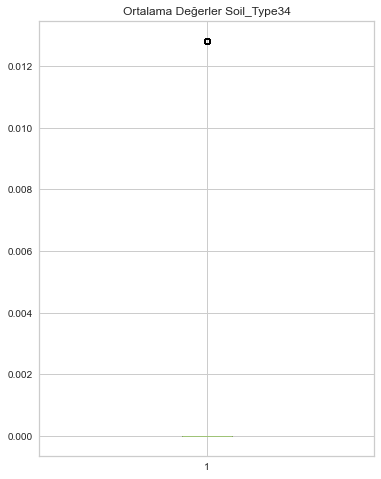

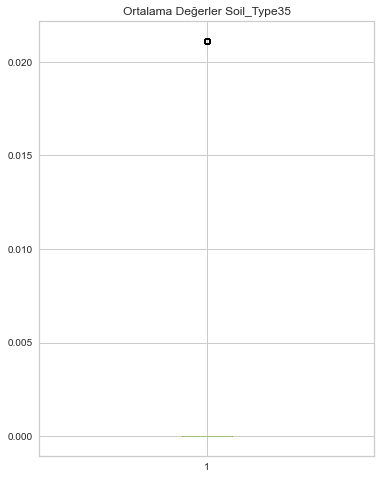

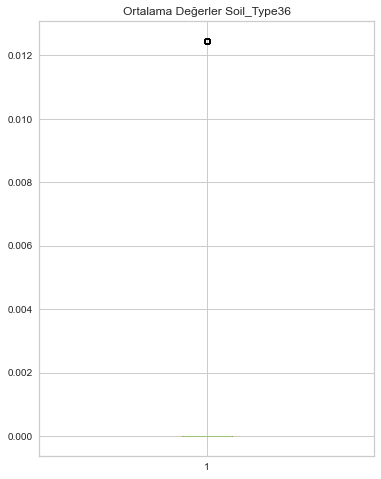

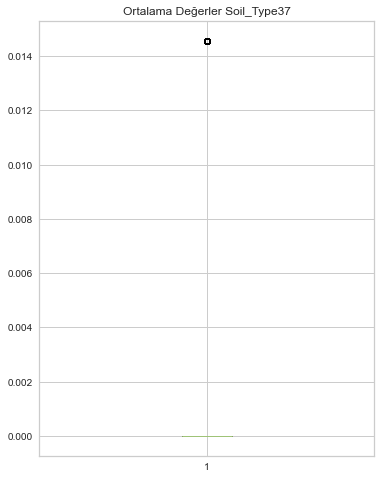

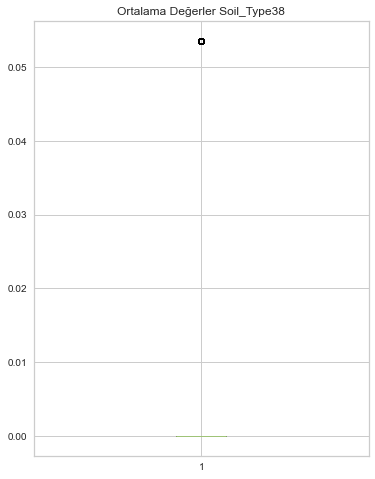

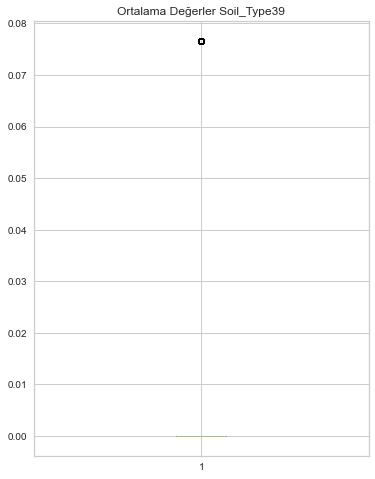

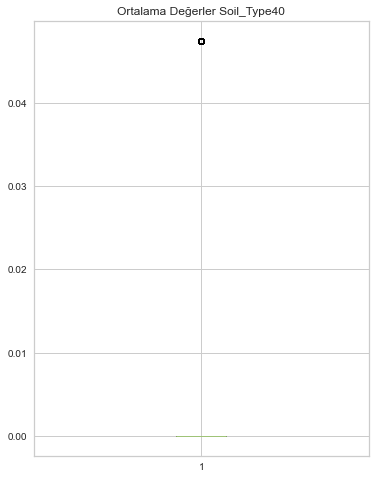

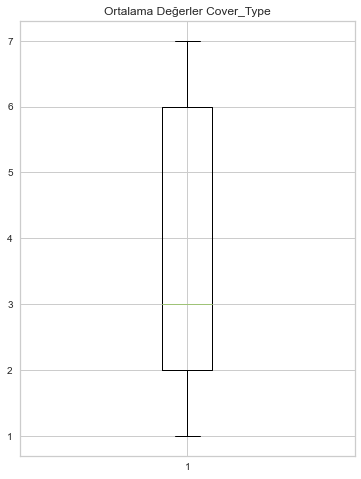

In [8]:
#Aykırı veriler kontrol
for i in df.columns:  
    plt.figure(2,figsize=(6,8))
    plt.title("Ortalama Değerler "+i)
    plt.boxplot(df[i])
    plt.show()

In [9]:
# Kümeleme için id hariç ilk 10 kolon alındı,Bellek yetersizliği yüzünden 5000 veri
df2=df.iloc[:5000,1:11]
df2

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,3317.0,131.0,20.000000,232.0,21.0,1762.0,237.0,195.0,136.0,3412.000000
1,3221.0,243.0,7.000000,163.0,161.0,2153.0,196.0,222.0,131.0,1948.000000
2,3156.0,305.0,12.000000,183.0,5.0,2769.0,240.0,253.0,235.0,3060.000000
3,3157.0,135.0,10.000000,68.0,55.0,1641.0,227.0,253.0,159.0,817.000000
4,3209.0,292.0,2.000000,430.0,39.0,460.0,223.0,246.0,125.0,1252.000000
...,...,...,...,...,...,...,...,...,...,...
4995,3256.0,55.0,14.000000,330.0,154.0,692.0,250.0,224.0,110.0,1532.003837
4996,3160.0,37.0,14.741257,635.0,55.0,1627.0,205.0,227.0,110.0,1691.000000
4997,3408.0,236.0,14.000000,240.0,9.0,4561.0,229.0,229.0,109.0,1951.000000
4998,3238.0,324.0,11.000000,61.0,29.0,2137.0,244.0,200.0,101.0,1707.000000


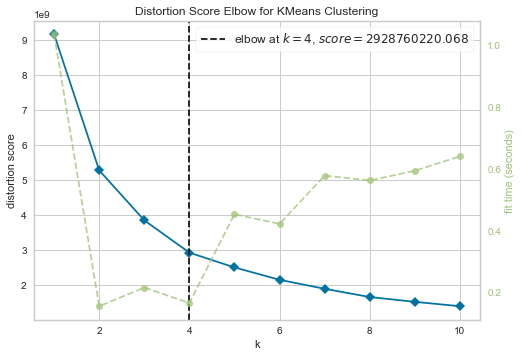

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,11))#1 den 11 e kadar küme sayılarını dene, en optimum k parametresini bul
visualizer.fit(df2)
visualizer.poof()

In [11]:
kmeans=KMeans(n_clusters=4)
k_fit=kmeans.fit(df2)

In [12]:
k_fit.labels_

array([3, 2, 3, ..., 0, 2, 1])

In [13]:
kumeler=k_fit.labels_
merkezler=k_fit.cluster_centers_
kumeler.shape,merkezler.shape

((5000,), (4, 10))

In [14]:
pd.DataFrame({'Elevation': df2.index,'Kumeler':kumeler})

,Elevation,Kumeler
0,0,3
1,1,2
2,2,3
3,3,1
4,4,1
...,...,...
4995,4995,1
4996,4996,1
4997,4997,0
4998,4998,2


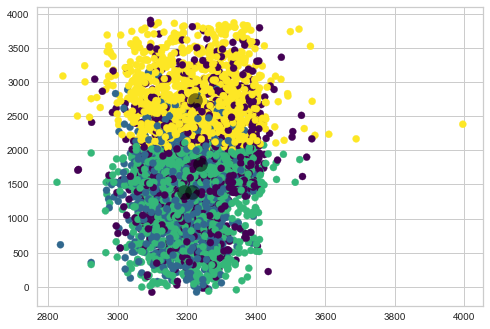

In [15]:
plt.scatter(df2.iloc[:,0],df2.iloc[:,9],c=kumeler,s=50,cmap='viridis')
plt.scatter(merkezler[:,0],merkezler[:,9],c='black',s=200,alpha=0.5)

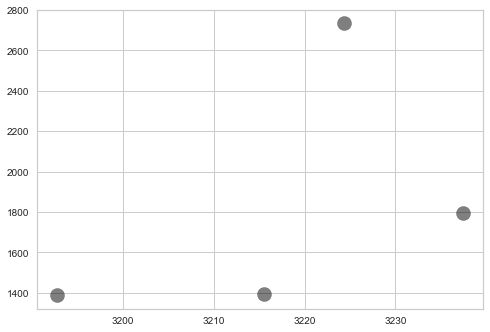

In [16]:
plt.scatter(merkezler[:,0],merkezler[:,9],c='black',s=200,alpha=0.5)

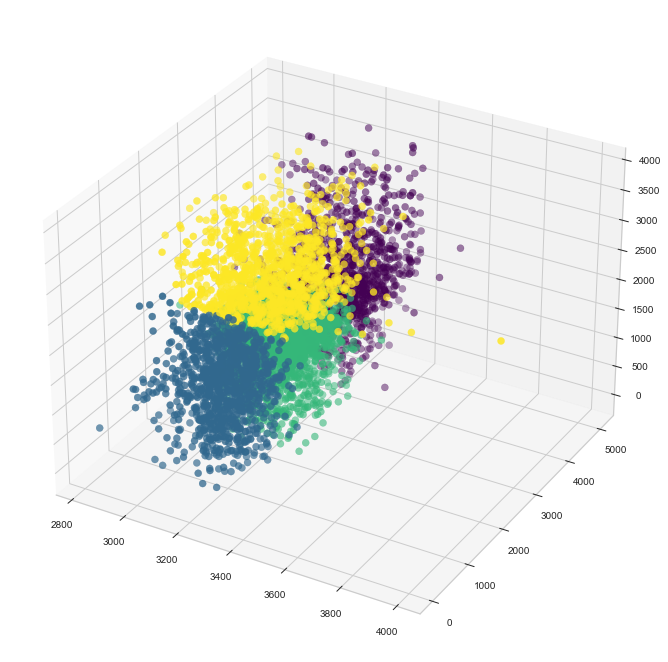

In [17]:
plt.rcParams["figure.figsize"]=(16,9)
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(df2.iloc[:,0],df2.iloc[:,5],df2.iloc[:,9],c=kumeler,s=50,cmap='viridis')

In [146]:
agglo = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
agglo_fit = agglo.fit(df2)

In [147]:
agglo_fit.labels_

array([2, 1, 2, ..., 0, 1, 3], dtype=int64)

In [136]:
kumeler2=agglo_fit.labels_
kumeler2.shape

(5000,)

In [148]:
pd.DataFrame({'Elevation': df2.index,'Kumeler':kumeler2})

,Elevation,Kumeler
0,0,2
1,1,1
2,2,2
3,3,1
4,4,3
...,...,...
4995,4995,3
4996,4996,1
4997,4997,0
4998,4998,1


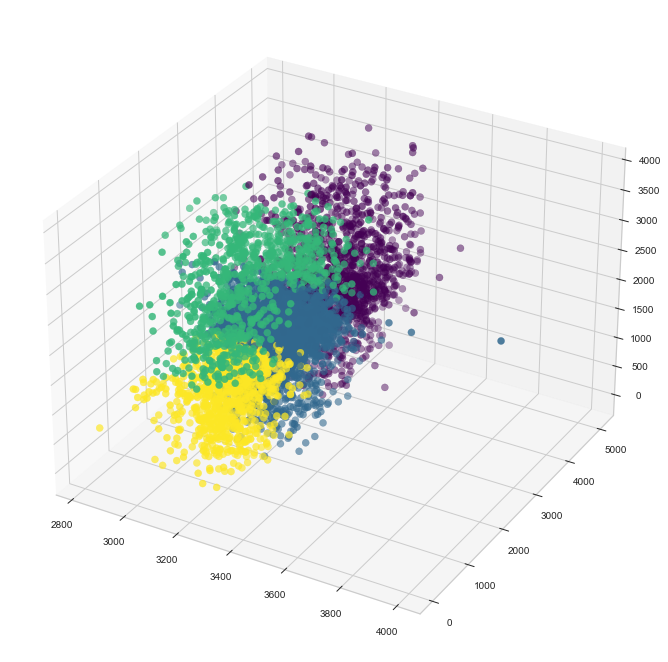

In [62]:
plt.rcParams["figure.figsize"]=(16,9)
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(df2.iloc[:,0],df2.iloc[:,5],df2.iloc[:,9],c=kumeler2,s=50,cmap='viridis')

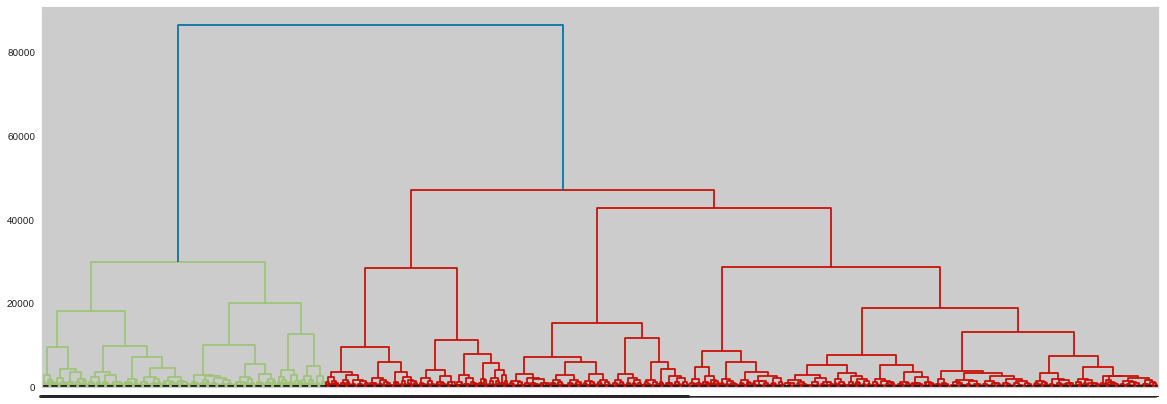

In [64]:
labels = range(1,50)
linked = linkage(df2, "ward")

plt.figure(figsize=(20,7))
dendrogram(linked,
           orientation="top",
           labels=kumeler2,
           show_leaf_counts=True)
plt.axhline(200,ls = "--", c ="k")
plt.show()

In [228]:
df3=df.iloc[:5000,1:2]
dbscan = DBSCAN(eps =0.3, min_samples =15,metric='euclidean')
dbscan_fit = dbscan.fit(df3)

In [229]:
kumeler3=dbscan_fit.labels_
kumeler3

array([-1,  0,  1, ..., -1, 54, 28], dtype=int64)

In [230]:
pd.DataFrame({'Elevation': df2.index,'Kumeler':kumeler3})

,Elevation,Kumeler
0,0,-1
1,1,0
2,2,1
3,3,2
4,4,3
...,...,...
4995,4995,90
4996,4996,-1
4997,4997,-1
4998,4998,54


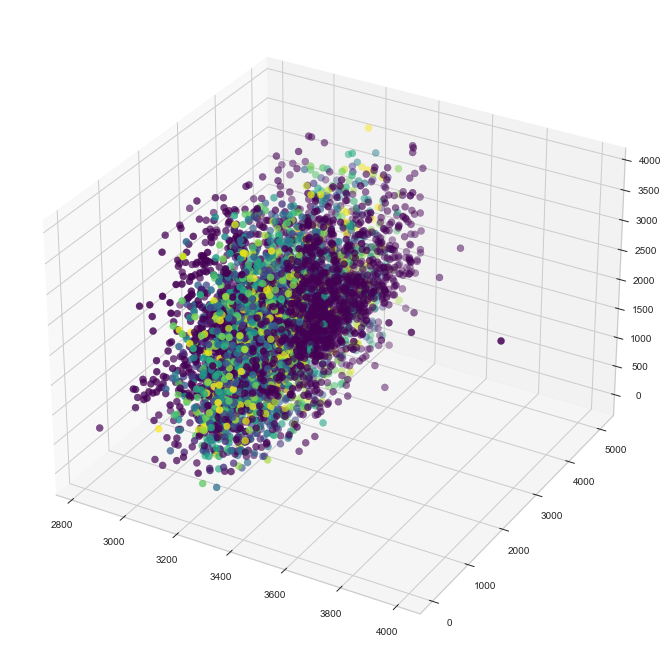

In [231]:
plt.rcParams["figure.figsize"]=(16,9)
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(df2.iloc[:,0],df2.iloc[:,5],df2.iloc[:,9],c=kumeler3,s=50,cmap='viridis')